In [107]:
#Importing numpy and Pandas Library to perform basic operations like reading,info,describe etc.
import numpy as np
import pandas as pd
#Importing Warning to avoid warnings.
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
#Importing sklearn libraries to perform modeling.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

#Importing RFE,VIF from sklearn to perform OneHotEncoding,eliminating columns on the basis of p values and VIF.
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import precision_recall_curve

# Setting basic operations to display all the column values.
pd.set_option("display.max_columns", None)
pd.set_option('display.max_columns',None)

#display all rows
pd.set_option('display.max_rows',None)
pd.set_option('display.width', None)

In [108]:
#Reading Lead CSV file and checking 5 head records
df_lead = pd.read_csv(r'leads.csv',header = 0)
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [109]:
df_lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [110]:
#Checking all dimensions of the frame(the rows and the columns)
df_lead.shape

(9240, 37)

In [111]:
#Checking column and their dtype
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [112]:
round(100*(sum(df_lead['Converted'])/len(df_lead.index)),2)

38.54

## Performing Data Cleaning

In [113]:
#Checking all the total null values in all columns
df_lead.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [114]:
#Printing the percentage of all null vlaues for further evaluation
#print((df_lead.isnull().sum()/len(df_lead.index))*100)
round(100*(df_lead.isnull().sum()/len(df_lead.index)),2).sort_values(ascending = False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [115]:
#Columns that have more than 30% NULL value can be considered for dropping.
#Here we will also observe few records and their values 

In [116]:
#Checking the unique values of the columns
df_lead['Prospect ID'].nunique()

9240

In [117]:
#In the above data, we have saw that the column 'Prospect ID' is a single value throughout the data.So we consider dropping it.
#We have created a list 'col_to_drop', in which we are going to add column that we consider to drop.
col_to_drop=[]
col_to_drop.append('Prospect ID')

In [118]:
df_lead['Lead Number'].nunique()


9240

In [119]:
#'Lead Number' has a single value throughout the frame.Thus, we consider to drop it.
col_to_drop.append('Lead Number')

In [120]:
df_lead['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [121]:
#'Do Not Email' data is skewed towards Yes. Thus, we drop it.
col_to_drop.append('Do Not Email')

In [122]:
df_lead['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [123]:
#'Do Not Call' is skewed towards No. Thus, we drop it.
col_to_drop.append('Do Not Call')

In [124]:
df_lead['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [125]:
#'Search' is skewed towards No. Thus, we drop it.
col_to_drop.append('Search')

In [126]:
df_lead['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [127]:
#'Magazine' has single value 'No' throughtout the frame. Thus, we drop it.
col_to_drop.append('Magazine')

In [128]:
df_lead['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [129]:
#'Newspaper Article' is skewed towards No. Thus, we drop it.
col_to_drop.append('Newspaper Article')

In [130]:
df_lead['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [131]:
# 'X Education Forums' Article is highly skewed towards No. Thus, we drop it.
col_to_drop.append('X Education Forums')

In [132]:
df_lead['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [133]:
#'Newspaper' is highly skewed towards No. Thus, we drop it.
col_to_drop.append('Newspaper')

In [134]:
df_lead['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [135]:
#'Digital Advertisement' is highly skewed towards No. Thus, we drop it.
col_to_drop.append('Digital Advertisement')

In [136]:
df_lead['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [137]:
# 'Through Recommendations' is highly skewed towards No. Thus, we drop it.
col_to_drop.append('Through Recommendations')

In [138]:
df_lead['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [139]:
# 'Receive More Updates About Our Courses' has single value No. Thus, we drop it.
col_to_drop.append('Receive More Updates About Our Courses')

In [140]:
df_lead['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [141]:
# 'A free copy of Mastering The Interview' is skewed towards No. Thus, we consider to drop it.Also, this column do not add any critical value in identificstion of Lead Potentials.
col_to_drop.append('A free copy of Mastering The Interview')

In [142]:
df_lead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [143]:
df_lead.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [144]:
# 'Country' and 'City' column do not add any contribution in identifying Lead Potentials.Thus, we also drop them.
col_to_drop.append('Country')
col_to_drop.append('City')

In [145]:
# Now, lets check how many columns are identified for dropping from the frame till this stage.
print(col_to_drop)

['Prospect ID', 'Lead Number', 'Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'A free copy of Mastering The Interview', 'Country', 'City']


In [146]:
df_lead['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [147]:
df_lead['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [148]:
# In the above section, we observe that a few columns has more than 30% NULL records. Thus, we preffered to drop those columns

col_to_drop.append('Lead Quality')                                     
col_to_drop.append('Asymmetrique Profile Score')                     
col_to_drop.append('Asymmetrique Activity Score') 
col_to_drop.append('Asymmetrique Profile Index')                   
col_to_drop.append('Asymmetrique Activity Index')
col_to_drop.append('Tags')

In [149]:
#Lets now check how many columns are identified to drop from frame.
print(col_to_drop)

['Prospect ID', 'Lead Number', 'Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'A free copy of Mastering The Interview', 'Country', 'City', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index', 'Tags']


In [150]:
#Lets drop these columns too and then check the dataset again
df_lead = df_lead.drop(columns=col_to_drop,axis =1)


In [151]:
df_lead.shape

(9240, 16)

In [152]:
round(100*(df_lead.isnull().sum()/len(df_lead.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
Lead Profile                                     29.32
I agree to pay the amount through cheque          0.00
Last Notable Activity                             0.00
dtype: float64

In [153]:
# The Columns with null value less than 30% can be dropped from records.
df_lead = df_lead.dropna(axis = 0)

In [154]:
df_lead.shape

(6372, 16)

In [155]:
# We will now find columns which are of no use and we will also consider dropping them because we still have 17 columns.
df_lead.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'Last Notable Activity'],
      dtype='object')

In [156]:
#Observing the Select count of above columns and replacing them with NULL.

print(df_lead['Lead Profile'].value_counts())   #Dropping this column coz it has more than 50% of data as select
print(df_lead['What matters most to you in choosing a course'].value_counts()) # Most of columns have a single value, consider dropping it.
print(df_lead['How did you hear about X Education'].value_counts()) #Column has single value more than other values. Consider dropping it too.
print(df_lead['Update me on Supply Chain Content'].value_counts())  #Single value on all the columns.Consider dropping it too.

Select                         4055
Potential Lead                 1554
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64
Better Career Prospects      6370
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
Select                   4886
Online Search             604
Word Of Mouth             250
Student of SomeSchool     238
Other                     145
Multiple Sources          113
Social Media               52
Advertisements             50
Email                      22
SMS                        12
Name: How did you hear about X Education, dtype: int64
No    6372
Name: Update me on Supply Chain Content, dtype: int64


In [157]:
df_lead['I agree to pay the amount through cheque'].value_counts()  #It contains single value in all columns.

No    6372
Name: I agree to pay the amount through cheque, dtype: int64

In [158]:
df_lead.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'Last Notable Activity'],
      dtype='object')

In [159]:
# df_lead['Get updates on DM Content'].value_counts() has single value in all the records.

In [160]:
col_to_drop1=[]
col_to_drop1.append('Lead Profile')
col_to_drop1.append('What matters most to you in choosing a course')
col_to_drop1.append('How did you hear about X Education')
col_to_drop1.append('Update me on Supply Chain Content')
col_to_drop1.append('I agree to pay the amount through cheque')
col_to_drop1.append('Get updates on DM Content')

In [161]:
df_lead = df_lead.drop(columns=col_to_drop1,axis =1)

In [162]:
df_lead.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'Last Notable Activity'],
      dtype='object')

In [163]:
df_lead.shape

(6372, 10)

## Data Cleaning: Completed

In [164]:
#Now moving forward with remaining 6372 records and 10 columns

## Performing Dumification

In [165]:
cols_dummy = []
for i in df_lead.columns:
    if df_lead[i].dtype == 'O':
        cols_dummy.append(i)

In [166]:
print(cols_dummy)

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Last Notable Activity']


In [167]:
# We will create dummy separately for Specialization. Moving ahead with other variable as of now.
cols_dummy.remove('Specialization')

In [168]:
df_lead_dummy = pd.get_dummies(df_lead[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation', 'Last Notable Activity']], drop_first=True)

In [169]:
df_lead_dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [170]:
#Now merging df_lead_dummy with df_lead frame.
df_lead = pd.concat([df_lead, df_lead_dummy], axis=1)

In [171]:
#Performing dummificaiton of specialization column and removing select_specialization value later.
df_lead_specialization= pd.get_dummies(df_lead['Specialization'],prefix='Specialization')


In [172]:
df_lead_specialization.drop(columns='Specialization_Select',axis = 1,inplace=True)
df_lead=pd.concat([df_lead,df_lead_specialization], axis = 1)

In [173]:
df_lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Unemployed,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [174]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 0 to 9239
Data columns (total 79 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           6372 non-null   object 
 1   Lead Source                                           6372 non-null   object 
 2   Converted                                             6372 non-null   int64  
 3   TotalVisits                                           6372 non-null   float64
 4   Total Time Spent on Website                           6372 non-null   int64  
 5   Page Views Per Visit                                  6372 non-null   float64
 6   Last Activity                                         6372 non-null   object 
 7   Specialization                                        6372 non-null   object 
 8   What is your current occupation                       6372

In [175]:
df_lead.shape

(6372, 79)

In [176]:
#Dropping 'original' columns for which dummy values are created.
cols_dummy

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'What is your current occupation',
 'Last Notable Activity']

In [177]:
#Adding the 'specialization' column as we have treated this separately and can be removed from the dataframe
cols_dummy.append('Specialization')

In [178]:
df_lead_new = df_lead.drop(columns=cols_dummy, axis = 1)

In [179]:
df_lead_new.shape

(6372, 73)

## Performing Modeling

In [180]:
# Train-Test Split
X = df_lead_new.drop(columns='Converted',axis =1)
y = df_lead_new['Converted']

In [181]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [182]:
X.shape

(6372, 72)

In [183]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [184]:
y.shape

(6372,)

In [185]:
#After observing the X and y values. Lets now split the data into train and test in the ratio of 70% and 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [186]:
#Printing the train and test shapes
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (4460, 72)
X_test (1912, 72)
y_train (4460,)
y_test (1912,)


In [187]:
#Performing the standard scaling
scaler = StandardScaler()

In [188]:
X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_testone', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation'

In [189]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [190]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4170,0.065399,0.701078,0.731572,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6812,2.347130,1.228050,-0.229986,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7717,-0.695177,-0.947262,-1.191544,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
207,0.255544,-0.312057,1.212351,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2044,-0.314889,-0.288991,-0.229986,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [191]:
#Lets describe 'int' values
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,4.460000e+03,4.460000e+03,4.460000e+03
mean,-1.448766e-17,6.623999e-17,-9.129468e-17
std,1.000112e+00,1.000112e+00,1.000112e+00
min,-6.951774e-01,-9.472620e-01,-1.191544e+00
25%,-5.050332e-01,-8.873789e-01,-7.107650e-01
50%,-1.247448e-01,-4.380333e-01,-2.299860e-01
75%,2.555436e-01,8.696377e-01,7.315722e-01
max,4.703102e+01,3.083984e+00,6.500921e+00


In [192]:
# checking 'Lead conversion rate'
round(100*(sum(df_lead_new['Converted'])/len(df_lead_new.index)),2)

48.1

In [193]:
#Let us now observe highly correlated values.
df_lead_new.corr()


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.009349,0.313277,-0.063002,-0.117447,0.288641,-0.019281,-0.133711,-0.021219,0.020103,0.018405,-0.044413,-0.034286,-0.012061,-0.012061,0.243178,-0.022266,0.000673,0.013014,0.144853,-0.006415,-0.012061,-0.138877,-0.134874,-0.033585,0.018405,-0.022513,0.018405,-0.036342,0.041569,-0.164222,-0.086659,0.285778,-0.021400,-0.032771,-0.011588,-0.012061,0.039065,0.011568,-0.034520,-0.259683,0.304832,-0.052388,-0.026312,0.018405,-0.010303,0.013014,0.046966,-0.239697,-0.039225,-0.031480,0.284234,0.050430,-0.026685,-0.012061,0.036201,0.014435,-0.017968,-0.015462,0.027026,0.028230,-0.006098,0.025816,-0.005722,-0.024814,0.049472,-0.000886,0.031312,-0.018621,0.008615,-0.005151,0.005753,-0.011786
TotalVisits,0.009349,1.000000,0.212987,0.499610,0.275695,-0.215681,-0.044508,0.080630,-0.043517,0.091246,-0.013172,-0.256563,0.201705,-0.001567,0.006180,-0.186789,0.048638,-0.004042,-0.004149,-0.100425,-0.004205,0.003598,-0.076748,-0.041795,-0.013739,0.001436,0.015321,0.006914,0.008331,0.021059,-0.078265,0.205458,-0.038899,0.014459,0.001528,0.023985,0.001016,-0.009009,0.033973,-0.031537,0.024481,-0.015715,-0.009157,0.003293,0.001436,0.030410,0.006180,0.027321,-0.089899,-0.004800,0.217036,-0.027775,0.003117,0.001949,0.011344,0.044734,0.037424,0.016163,0.020179,0.034527,0.029263,0.017651,0.035498,0.026972,0.030322,0.000715,0.040875,0.010212,0.015201,0.033466,0.015953,0.066717,0.067551
Total Time Spent on Website,0.313277,0.212987,1.000000,0.304302,0.275715,-0.249533,-0.061437,0.114033,-0.060953,0.227444,-0.016777,-0.320196,0.078921,-0.009092,-0.003929,-0.214898,0.018653,0.000555,0.014376,

In [279]:
#Feature Selection using RFE_
logreg = LogisticRegression()
rfe = RFE(logreg,step=15)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Live Chat', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Pay per Click Ads', False, 3),
 ('Lead Source_Press_Release', False, 4),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Social Media', False, 4),
 ('Lead Source_WeLearn', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 4),
 ('Lead Source_testone', False, 3),
 ('Last Activity_Converted to Lead', False, 2),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 4),
 ('Last Activity_Email Marked

In [280]:
col = X_train.columns[rfe.support_]

In [281]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Adm

In [282]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_testone', 'Last Activity_Converted to Lead',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'What is your current occupation_Other',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Marked Spam',
       'Las

## Building Model on a column Ranking by RFE

 # Building Model 1

In [283]:
X_train_sm = sm.add_constant(X_train[col])
logml = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res = logml.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4423
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2010.3
Date:                Sat, 25 Feb 2023   Deviance:                       4020.6
Time:                        13:03:41   Pearson chi2:                 4.53e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3832
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5347      0.672      0.796      0.426      -0.782       1.852
Total Time Spent on Website                              1.1138      0.047     23.624      0.000       1.021       1.206
Lead Origin_Landing Page Submission                     -0.6468      0.132     -4.898      0.000      -0.906      -0.388
Lead Origin_Lead Add Form                                1.3459      0.955      1.409      0.159      -0.526       3.218
Lead Source_Direct Traffic                              -0.4421      0.099     -4.448      0.000      -0.637      -0.247
Lead Source_Olark Chat                                   1.2681      0.140      9.067      0.000       0.994       1.542
Lead Source_Reference                                    1.9465      0.979      1.988      0.047       0.027       3.865
Lead Source_Welingak Website                             4.5376      1.386      3.273      0.001       1.820       7.255
Last Activity_Email Bounced                             -1.4863      0.363     -4.093      0.000      -2.198      -0.775
Last Activity_Had a Phone Conversation                   1.5905      1.027      1.549      0.121      -0.422       3.603
Last Activity_Olark Chat Conversation                   -0.6728      0.195     -3.456      0.001      -1.054      -0.291
Last Activity_SMS Sent                                   0.8818      0.088     10.049      0.000       0.710       1.054
What is your current occupation_Housewife               22.3175   2.81e+04      0.001      0.999   -5.51e+04    5.51e+04
What is your current occupation_Student                 -1.2434      0.703     -1.768      0.077      -2.622       0.135
What is your current occupation_Unemployed              -1.2552      0.666     -1.883      0.060      -2.561       0.051
What is your current occupation_Working Professional     1.1249      0.692      1.626      0.104      -0.231       2.481
Last Notable Activity_Email Link Clicked                -0.4493      0.288     -1.561      0.118      -1.013       0.115
Last Notable Activity_Had a Phone Conversation          22.0830   1.97e+04      0.001      0.999   -3.86e+04    3.86e+04
Last Notable Activity_Modified                          -0.8426      0.096     -8.813      0.000      -1.030      -0.655
Last Notable Activity_Page Visited on Website           -0.2938      0.217     -1.357      0.175      -0.718       0.131
Last Notable Activity_Unreachable                        2.4583      0.814      3.019      0.003       0.862       4.054
Last Notable Activity_Unsubscribed                      -0.7598      0.591     -1.285      0.199      -1.919       0.399
Specialization_Banking, Investment And Insurance         1

In [284]:
#Performing VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF' ,ascending = False)
print(vif)

                                             Features    VIF
2                           Lead Origin_Lead Add Form  69.63
5                               Lead Source_Reference  54.04
6                        Lead Source_Welingak Website  16.60
13         What is your current occupation_Unemployed   6.45
1                 Lead Origin_Landing Page Submission   6.20
8              Last Activity_Had a Phone Conversation   2.86
16     Last Notable Activity_Had a Phone Conversation   2.86
14  What is your current occupation_Working Profes...   1.95
4                              Lead Source_Olark Chat   1.93
3                          Lead Source_Direct Traffic   1.92
10                             Last Activity_SMS Sent   1.83
25                  Specialization_Finance Management   1.80
17                     Last Notable Activity_Modified   1.77
27           Specialization_Human Resource Management   1.69
29                Specialization_Marketing Management   1.66
31               Special

In [285]:
#Dropping column which has high VIF or > 5 "Lead Origin_Lead Add Form" 

col = col.drop('Lead Origin_Lead Add Form')

In [286]:
#Building Model2 with remaining columns.

#  Building Model 2

In [287]:
X_train_sm2 = sm.add_constant(X_train[col])
logml2 = sm.GLM(y_train, X_train_sm2 , family= sm.families.Binomial())
res2 = logml2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4424
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.3
Date:                Sat, 25 Feb 2023   Deviance:                       4022.6
Time:                        13:03:48   Pearson chi2:                 4.53e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3829
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5399      0.672      0.804      0.421      -0.776       1.856
Total Time Spent on Website                              1.1113      0.047     23.616      0.000       1.019       1.204
Lead Origin_Landing Page Submission                     -0.6587      0.132     -4.995      0.000      -0.917      -0.400
Lead Source_Direct Traffic                              -0.4429      0.099     -4.457      0.000      -0.638      -0.248
Lead Source_Olark Chat                                   1.2607      0.140      9.034      0.000       0.987       1.534
Lead Source_Reference                                    3.2794      0.255     12.838      0.000       2.779       3.780
Lead Source_Welingak Website                             5.8726      1.013      5.798      0.000       3.887       7.858
Last Activity_Email Bounced                             -1.4871      0.363     -4.096      0.000      -2.199      -0.776
Last Activity_Had a Phone Conversation                   1.5857      1.027      1.545      0.122      -0.427       3.598
Last Activity_Olark Chat Conversation                   -0.6765      0.195     -3.477      0.001      -1.058      -0.295
Last Activity_SMS Sent                                   0.8824      0.088     10.058      0.000       0.710       1.054
What is your current occupation_Housewife               22.3211   2.81e+04      0.001      0.999    -5.5e+04    5.51e+04
What is your current occupation_Student                 -1.2419      0.703     -1.766      0.077      -2.620       0.136
What is your current occupation_Unemployed              -1.2520      0.666     -1.879      0.060      -2.558       0.054
What is your current occupation_Working Professional     1.1252      0.692      1.627      0.104      -0.230       2.481
Last Notable Activity_Email Link Clicked                -0.4515      0.288     -1.569      0.117      -1.015       0.112
Last Notable Activity_Had a Phone Conversation          22.0835   1.97e+04      0.001      0.999   -3.85e+04    3.86e+04
Last Notable Activity_Modified                          -0.8434      0.096     -8.825      0.000      -1.031      -0.656
Last Notable Activity_Page Visited on Website           -0.2955      0.216     -1.365      0.172      -0.720       0.129
Last Notable Activity_Unreachable                        2.4528      0.814      3.013      0.003       0.857       4.049
Last Notable Activity_Unsubscribed                      -0.7611      0.591     -1.288      0.198      -1.919       0.397
Specialization_Banking, Investment And Insurance         1.1361      0.222      5.116      0.000       0.701       1.571
Specialization_Business Administration                   0

In [288]:
#Performing VIF again 
vif = pd.DataFrame()
vif['Features'] = X_train_sm2[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm2[col].values,i) for i in range(X_train_sm2[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF' ,ascending = False)
print(vif)

                                             Features   VIF
12         What is your current occupation_Unemployed  6.43
1                 Lead Origin_Landing Page Submission  6.19
7              Last Activity_Had a Phone Conversation  2.86
15     Last Notable Activity_Had a Phone Conversation  2.86
13  What is your current occupation_Working Profes...  1.95
3                              Lead Source_Olark Chat  1.93
2                          Lead Source_Direct Traffic  1.92
9                              Last Activity_SMS Sent  1.83
24                  Specialization_Finance Management  1.80
16                     Last Notable Activity_Modified  1.77
26           Specialization_Human Resource Management  1.69
4                               Lead Source_Reference  1.67
28                Specialization_Marketing Management  1.66
30               Specialization_Operations Management  1.38
21             Specialization_Business Administration  1.37
8               Last Activity_Olark Chat

In [289]:
#We observed that all VIF values are under 5.Now let drop columns on the basis of p value.whree p value is greter than 0.05 drop those columns.
#We have Last Notable Activity_Had a Phone Conversation column with .99 as p value.Lets drop that column
col = col.drop('Last Notable Activity_Had a Phone Conversation')

# Building Model 3

In [290]:
X_train_sm3 = sm.add_constant(X_train[col])
logml3 = sm.GLM(y_train, X_train_sm3 , family= sm.families.Binomial())
res3 = logml3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4425
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2013.0
Date:                Sat, 25 Feb 2023   Deviance:                       4025.9
Time:                        13:03:55   Pearson chi2:                 4.53e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3825
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5373      0.672      0.800      0.424      -0.779       1.854
Total Time Spent on Website                              1.1103      0.047     23.596      0.000       1.018       1.202
Lead Origin_Landing Page Submission                     -0.6562      0.132     -4.983      0.000      -0.914      -0.398
Lead Source_Direct Traffic                              -0.4461      0.099     -4.494      0.000      -0.641      -0.252
Lead Source_Olark Chat                                   1.2619      0.140      9.040      0.000       0.988       1.536
Lead Source_Reference                                    3.2815      0.256     12.843      0.000       2.781       3.782
Lead Source_Welingak Website                             5.8756      1.013      5.801      0.000       3.890       7.861
Last Activity_Email Bounced                             -1.4843      0.363     -4.087      0.000      -2.196      -0.773
Last Activity_Had a Phone Conversation                   2.7278      0.810      3.366      0.001       1.139       4.316
Last Activity_Olark Chat Conversation                   -0.6712      0.195     -3.449      0.001      -1.053      -0.290
Last Activity_SMS Sent                                   0.8808      0.088     10.041      0.000       0.709       1.053
What is your current occupation_Housewife               21.3219    1.7e+04      0.001      0.999   -3.34e+04    3.34e+04
What is your current occupation_Student                 -1.2411      0.703     -1.765      0.078      -2.619       0.137
What is your current occupation_Unemployed              -1.2503      0.666     -1.876      0.061      -2.556       0.056
What is your current occupation_Working Professional     1.1266      0.692      1.629      0.103      -0.229       2.482
Last Notable Activity_Email Link Clicked                -0.4540      0.288     -1.578      0.115      -1.018       0.110
Last Notable Activity_Modified                          -0.8524      0.095     -8.930      0.000      -1.039      -0.665
Last Notable Activity_Page Visited on Website           -0.2983      0.216     -1.378      0.168      -0.722       0.126
Last Notable Activity_Unreachable                        2.4507      0.814      3.010      0.003       0.855       4.047
Last Notable Activity_Unsubscribed                      -0.7647      0.591     -1.294      0.196      -1.923       0.393
Specialization_Banking, Investment And Insurance         1.1519      0.221      5.207      0.000       0.718       1.585
Specialization_Business Administration                   0.6419      0.200      3.204      0.001       0.249       1.035
Specialization_E-Business                                0

In [291]:
#We have a column What is your current occupation_Working Professional with p value highest among all.Lets drop it.
col = col.drop('What is your current occupation_Working Professional')

# Building Model 4

In [292]:
X_train_sm4 = sm.add_constant(X_train[col])
logml4 = sm.GLM(y_train, X_train_sm4 , family= sm.families.Binomial())
res4 = logml4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4426
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2014.2
Date:                Sat, 25 Feb 2023   Deviance:                       4028.3
Time:                        13:03:58   Pearson chi2:                 4.51e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3821
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.5898      0.212      7.501      0.000       1.174       2.005
Total Time Spent on Website                          1.1104      0.047     23.595      0.000       1.018       1.203
Lead Origin_Landing Page Submission                 -0.6520      0.132     -4.954      0.000      -0.910      -0.394
Lead Source_Direct Traffic                          -0.4486      0.099     -4.522      0.000      -0.643      -0.254
Lead Source_Olark Chat                               1.2630      0.140      9.048      0.000       0.989       1.537
Lead Source_Reference                                3.2850      0.255     12.859      0.000       2.784       3.786
Lead Source_Welingak Website                         5.8753      1.013      5.800      0.000       3.890       7.861
Last Activity_Email Bounced                         -1.4768      0.362     -4.076      0.000      -2.187      -0.767
Last Activity_Had a Phone Conversation               2.7312      0.810      3.370      0.001       1.143       4.320
Last Activity_Olark Chat Conversation               -0.6678      0.194     -3.435      0.001      -1.049      -0.287
Last Activity_SMS Sent                               0.8853      0.088     10.104      0.000       0.714       1.057
What is your current occupation_Housewife           20.2725    1.7e+04      0.001      0.999   -3.34e+04    3.34e+04
What is your current occupation_Student             -2.2949      0.295     -7.775      0.000      -2.873      -1.716
What is your current occupation_Unemployed          -2.3045      0.190    -12.126      0.000      -2.677      -1.932
Last Notable Activity_Email Link Clicked            -0.4494      0.287     -1.563      0.118      -1.013       0.114
Last Notable Activity_Modified                      -0.8519      0.095     -8.926      0.000      -1.039      -0.665
Last Notable Activity_Page Visited on Website       -0.3041      0.217     -1.404      0.160      -0.729       0.120
Last Notable Activity_Unreachable                    2.4514      0.814      3.010      0.003       0.855       4.048
Last Notable Activity_Unsubscribed                  -0.7553      0.589     -1.283      0.200      -1.910       0.399
Specialization_Banking, Investment And Insurance     1.1508      0.221      5.205      0.000       0.717       1.584
Specialization_Business Administration               0.6278      0.200      3.133      0.002       0.235       1.021
Specialization_E-Business                            0.8165      0.481      1.699      0.089      -0.125       1.758
Specialization_E-COMMERCE                            1.1033      0.355      3.105      0.002       0.407       1.800
Specialization_Finance Management        

In [293]:
#Performing VIF again 
vif = pd.DataFrame()
vif['Features'] = X_train_sm2[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm2[col].values,i) for i in range(X_train_sm2[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF' ,ascending = False)
print(vif)

                                            Features   VIF
1                Lead Origin_Landing Page Submission  6.02
12        What is your current occupation_Unemployed  4.18
2                         Lead Source_Direct Traffic  1.92
3                             Lead Source_Olark Chat  1.74
22                 Specialization_Finance Management  1.70
14                    Last Notable Activity_Modified  1.70
9                             Last Activity_SMS Sent  1.69
24          Specialization_Human Resource Management  1.60
26               Specialization_Marketing Management  1.56
4                              Lead Source_Reference  1.51
8              Last Activity_Olark Chat Conversation  1.33
19            Specialization_Business Administration  1.32
28              Specialization_Operations Management  1.31
25             Specialization_IT Projects Management  1.30
0                        Total Time Spent on Website  1.28
31            Specialization_Supply Chain Management  1.

In [294]:
# We are good with 'p value' and 'VIF' value.

# Getting the predicted values on the train data set.

In [295]:
y_train_pred = res4.predict(X_train_sm4)

In [296]:
y_train_pred

4170    0.651969
6812    0.615247
7717    0.376722
207     0.128628
2044    0.131527
3330    0.729586
6498    0.039068
2085    0.983837
6260    0.117786
19      0.081258
4647    0.034392
5380    0.019975
9217    0.594319
5132    0.288107
6372    0.636716
983     0.660733
3542    0.993268
1267    0.888158
3508    0.024923
8927    0.691540
6054    0.560945
2628    0.200918
5186    0.610424
6792    0.985979
2686    0.996025
175     0.026528
2443    0.292932
3983    0.968908
2028    0.204986
6592    0.183040
3563    0.544999
3154    0.209594
5188    0.290508
8302    0.548135
4903    0.227417
3120    0.818947
6060    0.376722
4358    0.406224
772     0.120803
7992    0.259792
1940    0.155708
4476    0.122783
4048    0.803469
4635    0.154652
3817    0.947998
5459    0.938104
8881    0.046282
1753    0.917119
4119    0.594319
2381    0.116791
7408    0.700501
1518    0.875683
3375    0.221279
4584    0.238345
9138    0.275568
6682    0.026676
439     0.180917
6098    0.111535
2410    0.9394

In [297]:
y_train_pred.shape

(4460,)

In [298]:
y_train_pred = y_train_pred.values.reshape(-1)

In [299]:
y_train_pred.shape

(4460,)

In [300]:
y_train_pred[:10]

array([0.65196927, 0.61524677, 0.37672209, 0.12862847, 0.13152654,
       0.72958591, 0.03906811, 0.98383738, 0.11778615, 0.08125788])

In [301]:
# Creating a data frame with columns 'converted' and 'converted probability'

y_train_pred_df = pd.DataFrame({'Converted': y_train.values,'Converted_Prediction':y_train_pred })
y_train_pred_df['Student_ID'] = y_train.index
y_train_pred_df.head()

,Converted,Converted_Prediction,Student_ID
0,1,0.651969,4170
1,1,0.615247,6812
2,1,0.376722,7717
3,0,0.128628,207
4,0,0.131527,2044


In [302]:
y_train_pred_df['Model_Predicted'] = y_train_pred_df['Converted_Prediction'].map(lambda x: 1 if x > 0.5 else 0 )

In [303]:
# Creating a model prediction 1, if the 'converted_prediction > .5' else '0'
y_train_pred_df.head()

,Converted,Converted_Prediction,Student_ID,Model_Predicted
0,1,0.651969,4170,1
1,1,0.615247,6812,1
2,1,0.376722,7717,0
3,0,0.128628,207,0
4,0,0.131527,2044,0


In [304]:
# Confusion matrix and accuracy
confusion = metrics.confusion_matrix(y_train_pred_df['Converted'], y_train_pred_df['Model_Predicted'])

In [305]:
confusion

array([[1939,  380],
       [ 528, 1613]])

In [306]:
accuracy = metrics.accuracy_score(y_train_pred_df['Converted'], y_train_pred_df['Model_Predicted'])

In [307]:
print(accuracy)

0.7964125560538117


In [308]:
TN = confusion[0,0] ## True negative
TP = confusion[1,1] ## True positive
FP = confusion[0,1] ## False postive
FN = confusion[1,0] ## False Negative

In [309]:
Sensitivity = TP/float(TP+FN)
Specificity = TN/ float(TN+FP)
FPR = FP/ float(TN+FP)   #False Positive Rate
PPR = TP / float(TP+FP)#Positive Predictive Rate
NPR = TN / float(TN+ FN) #Negative Predictive Rate

In [310]:
print("Sensitivity:" ,Sensitivity)
print ("Specificity:",Specificity)
print("FPR:",FPR)
print("PPR:",PPR)
print("NPR:",NPR)

Sensitivity: 0.7533862680990191
Specificity: 0.8361362656317378
FPR: 0.16386373436826218
PPR: 0.809332664325138
NPR: 0.7859748682610458


In [311]:
# Plotting now the ROC Curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

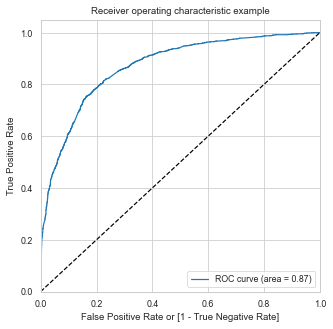

In [312]:
draw_roc(y_train_pred_df['Converted'], y_train_pred_df['Converted_Prediction'])

In [313]:
# Calculate the accuracy, sensitivity, and specificity for the various probability cut-offs.

In [314]:
numbers = [float(x)/10 for x in range(10)]
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [315]:
for i in numbers:
    y_train_pred_df[i] = y_train_pred_df['Converted_Prediction'].apply(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Converted,Converted_Prediction,Student_ID,Model_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.651969,4170,1,1,1,1,1,1,1,1,0,0,0
1,1,0.615247,6812,1,1,1,1,1,1,1,1,0,0,0
2,1,0.376722,7717,0,1,1,1,1,0,0,0,0,0,0
3,0,0.128628,207,0,1,1,0,0,0,0,0,0,0,0
4,0,0.131527,2044,0,1,1,0,0,0,0,0,0,0,0


In [316]:
metrics_df = pd.DataFrame(columns=['probability','accuracy','sensitivity','specificity'])

In [317]:
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_df['Converted'], y_train_pred_df[i])
    total = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensititvity = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    metrics_df.loc[i] = [i,accuracy,sensititvity,specificity]
print(metrics_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.480045     1.000000     0.000000
0.1          0.1  0.574215     0.987856     0.192324
0.2          0.2  0.704709     0.949089     0.479086
0.3          0.3  0.767040     0.891639     0.652005
0.4          0.4  0.791256     0.804297     0.779215
0.5          0.5  0.796413     0.753386     0.836136
0.6          0.6  0.771973     0.651098     0.883571
0.7          0.7  0.747982     0.565156     0.916774
0.8          0.8  0.718386     0.463335     0.953859
0.9          0.9  0.658520     0.308734     0.981458


<Figure size 1080x576 with 0 Axes>

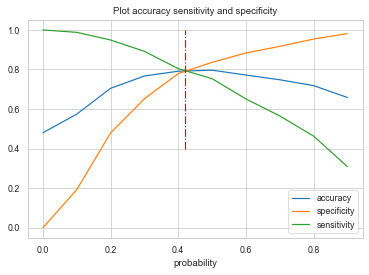

In [318]:
# Plotting now the above numbers

plt.figure(figsize=[15,8])
metrics_df.plot.line(x='probability', y= ['accuracy','specificity','sensitivity'])
plt.vlines(x=0.42, ymax=1, ymin=0.4, colors="r", linestyles="-.")
plt.title("Plot accuracy sensitivity and specificity")
plt.show()

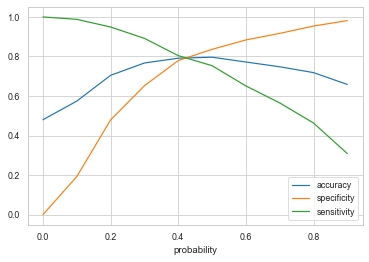

In [319]:
metrics_df.plot.line(x='probability', y= ['accuracy','specificity','sensitivity'])
plt.show()

In [320]:
# The .42 looks like the optimum point to take the cut-off probability.
y_train_pred_df.head()

,Converted,Converted_Prediction,Student_ID,Model_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.651969,4170,1,1,1,1,1,1,1,1,0,0,0
1,1,0.615247,6812,1,1,1,1,1,1,1,1,0,0,0
2,1,0.376722,7717,0,1,1,1,1,0,0,0,0,0,0
3,0,0.128628,207,0,1,1,0,0,0,0,0,0,0,0
4,0,0.131527,2044,0,1,1,0,0,0,0,0,0,0,0


In [321]:
y_train_pred_df['Predicted_at_Cutoff_0.42'] = y_train_pred_df['Converted_Prediction'].map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_df.head()

,Converted,Converted_Prediction,Student_ID,Model_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_at_Cutoff_0.42
0,1,0.651969,4170,1,1,1,1,1,1,1,1,0,0,0,1
1,1,0.615247,6812,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.376722,7717,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.128628,207,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.131527,2044,0,1,1,0,0,0,0,0,0,0,0,0


In [322]:
# Dropping now the cut-off columns

for i in numbers:
    y_train_pred_df = y_train_pred_df.drop(columns=i , axis = 1)
y_train_pred_df.head()

,Converted,Converted_Prediction,Student_ID,Model_Predicted,Predicted_at_Cutoff_0.42
0,1,0.651969,4170,1,1
1,1,0.615247,6812,1,1
2,1,0.376722,7717,0,0
3,0,0.128628,207,0,0
4,0,0.131527,2044,0,0


In [323]:
y_train_pred_df.head()

,Converted,Converted_Prediction,Student_ID,Model_Predicted,Predicted_at_Cutoff_0.42
0,1,0.651969,4170,1,1
1,1,0.615247,6812,1,1
2,1,0.376722,7717,0,0
3,0,0.128628,207,0,0
4,0,0.131527,2044,0,0


## Assigning The  Lead Score

In [324]:
y_train_pred_df['Lead_Score'] = y_train_pred_df['Converted_Prediction'].apply(lambda x: round(x*100))

In [325]:
y_train_pred_df.head()

,Converted,Converted_Prediction,Student_ID,Model_Predicted,Predicted_at_Cutoff_0.42,Lead_Score
0,1,0.651969,4170,1,1,65
1,1,0.615247,6812,1,1,62
2,1,0.376722,7717,0,0,38
3,0,0.128628,207,0,0,13
4,0,0.131527,2044,0,0,13


In [326]:
accuracy = metrics.accuracy_score(y_train_pred_df['Converted'], y_train_pred_df['Predicted_at_Cutoff_0.42'])
print(accuracy)

0.7932735426008969


In [327]:
confusion = metrics.confusion_matrix(y_train_pred_df['Converted'], y_train_pred_df['Predicted_at_Cutoff_0.42'])
print(confusion)

[[1840  479]
 [ 443 1698]]


In [328]:
#Assigning Lead Scores
y_train_pred_df['Lead_Score'] = y_train_pred_df['Converted_Prediction'].apply(lambda x: round(x*100))

In [329]:
accuracy_final = metrics.accuracy_score(y_train_pred_df['Converted'], y_train_pred_df['Predicted_at_Cutoff_0.42'])
print(accuracy_final)

0.7932735426008969


In [330]:
confusion_final = metrics.confusion_matrix(y_train_pred_df['Converted'], y_train_pred_df['Predicted_at_Cutoff_0.42'])
print(confusion_final)

[[1840  479]
 [ 443 1698]]


In [331]:
pd.crosstab(y_train_pred_df['Converted'], y_train_pred_df['Predicted_at_Cutoff_0.42'], rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,1840,479,2319
1,443,1698,2141
All,2283,2177,4460


In [332]:
TN_final = confusion_final[0,0] ## True negative
TP_final = confusion_final[1,1] ## True positive
FP_final = confusion_final[0,1] ## False postive
FN_final = confusion_final[1,0] ## False Negative

In [333]:
# Checking Sensitivity
print(TP_final / float(TP_final+FN_final))

0.7930873423633816


In [334]:
# Checking Specificity of Regression Model
print(TN_final / float (TN_final+FP_final))

0.7934454506252695


In [335]:
#### Calculating the false positive rate - here we will say that the Lead will get converted, when actually it didn't.

print(FP_final/float(TN_final+FP_final))

0.2065545493747305


In [336]:
#### Checking Positive predicted value

print(TP_final/float(TP_final+FP_final))

0.7799724391364262


In [337]:
#### checking Negative predicted value

print(TN_final/float(TN_final+FN_final))

0.8059570740254052


In [338]:
# Computing now Precision and Recall

precision = precision_score(y_train_pred_df['Converted'],y_train_pred_df['Predicted_at_Cutoff_0.42'])
recall = recall_score(y_train_pred_df['Converted'],y_train_pred_df['Predicted_at_Cutoff_0.42'])
print('Precision_Score = ', precision)
print('Recall_Score = ', recall)

Precision_Score =  0.7799724391364262
Recall_Score =  0.7930873423633816


In [339]:
print(metrics.classification_report(y_train_pred_df['Converted'], y_train_pred_df['Predicted_at_Cutoff_0.42']))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2319
           1       0.78      0.79      0.79      2141

    accuracy                           0.79      4460
   macro avg       0.79      0.79      0.79      4460
weighted avg       0.79      0.79      0.79      4460



In [340]:
p, r , threshold = precision_recall_curve(y_train_pred_df['Converted'] , y_train_pred_df['Converted_Prediction'])

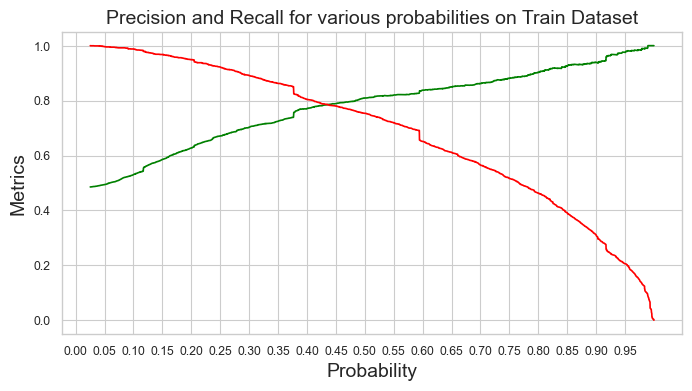

In [341]:
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") 
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(threshold,p[:-1], 'g-')
plt.plot(threshold,r[:-1], 'r-')
plt.xticks(np.arange(0, 1, step=0.05))
plt.title('Precision and Recall for various probabilities on Train Dataset', fontsize=14)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.show()

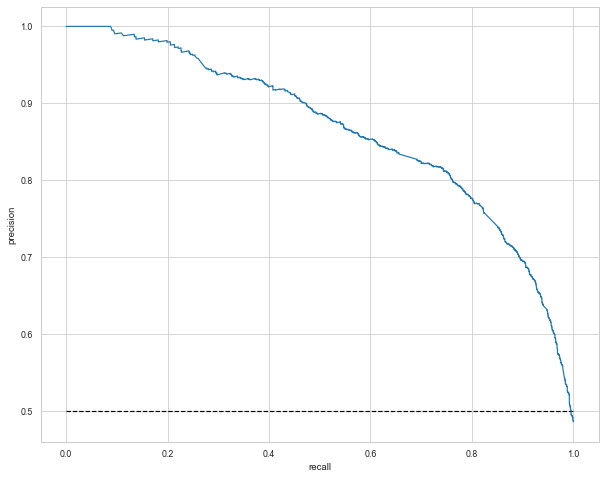

In [342]:
plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(r, p, label = 'Knn')
plt.xlabel('recall')
plt.ylabel('precision')

plt.show()

In [343]:
auc_prc = metrics.auc(r, p)
print('AUC Score = ', auc_prc)

AUC Score =  0.8644850658571723


### Final Snapshot of the Trained Dataframe

In [344]:
y_train_pred_df.head()

,Converted,Converted_Prediction,Student_ID,Model_Predicted,Predicted_at_Cutoff_0.42,Lead_Score
0,1,0.651969,4170,1,1,65
1,1,0.615247,6812,1,1,62
2,1,0.376722,7717,0,0,38
3,0,0.128628,207,0,0,13
4,0,0.131527,2044,0,0,13


# Making Prediction on Test Dataset

In [345]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Manage

In [346]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8402,-0.944498,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8782,-0.947183,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6199,-0.945977,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6482,-0.948943,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6026,-0.948943,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [347]:
X_test_sm = sm.add_constant(X_test)
y_test_predicted = res4.predict(X_test_sm)
y_test_predicted.head()

8402    0.068155
8782    0.046350
6199    0.213728
6482    0.562728
6026    0.820042
dtype: float64

In [348]:
y_test_predicted_df = pd.DataFrame(y_test_predicted)
y_test_predicted_df.head()

,0
8402,0.068155
8782,0.046350
6199,0.213728
6482,0.562728
6026,0.820042


In [349]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
8402,1
8782,0
6199,1
6482,1
6026,1


In [350]:
y_test_df['Student_ID'] = y_test_df.index

In [351]:
y_test_df.head()

,Converted,Student_ID
8402,1,8402
8782,0,8782
6199,1,6199
6482,1,6482
6026,1,6026


In [352]:
#Removing index of both the dataframes and aligning them side to side

y_test_predicted_df.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)
y_test_predicted_df.head()

,0
0,0.068155
1,0.046350
2,0.213728
3,0.562728
4,0.820042


In [353]:

y_test_predicted_final = pd.concat([y_test_df,y_test_predicted_df], axis = 1)
y_test_predicted_final.head()

,Converted,Student_ID,0
0,1,8402,0.068155
1,0,8782,0.046350
2,1,6199,0.213728
3,1,6482,0.562728
4,1,6026,0.820042


In [354]:
y_test_predicted_final.rename({0: 'Converted_Prediction'}, axis=1, inplace=True)

# Re-arranging columns

y_test_predicted_final = y_test_predicted_final[['Student_ID','Converted','Converted_Prediction']]

In [355]:
#Predicting converted non-converted Lead, based upon the threshold identified earlier.

y_test_predicted_final['Model_Predicted'] = y_test_predicted_final['Converted_Prediction'].map(lambda x: 1 if x > 0.42 else 0)

In [356]:
y_test_predicted_final.head()

,Student_ID,Converted,Converted_Prediction,Model_Predicted
0,8402,1,0.068155,0
1,8782,0,0.046350,0
2,6199,1,0.213728,0
3,6482,1,0.562728,1
4,6026,1,0.820042,1


## Assigning Lead Score

In [357]:
y_test_predicted_final['Lead_Score'] = y_test_predicted_final['Converted_Prediction'].apply(lambda x: round(x*100))

In [358]:
y_test_predicted_final.head()

,Student_ID,Converted,Converted_Prediction,Model_Predicted,Lead_Score
0,8402,1,0.068155,0,7
1,8782,0,0.046350,0,5
2,6199,1,0.213728,0,21
3,6482,1,0.562728,1,56
4,6026,1,0.820042,1,82


In [359]:
#Checking the scores
accuracy_test = metrics.accuracy_score(y_test_predicted_final['Converted'], y_test_predicted_final['Model_Predicted'])
confusion_test = metrics.confusion_matrix(y_test_predicted_final['Converted'], y_test_predicted_final['Model_Predicted'])
print(accuracy_test)
print(confusion_test)

0.6903765690376569
[[938  50]
 [542 382]]


In [360]:
pd.crosstab(y_test_predicted_final['Converted'], y_test_predicted_final['Model_Predicted'], rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,938,50,988
1,542,382,924
All,1480,432,1912


In [361]:
TP_test = confusion_test[1,1]
TN_test = confusion_test[0,0]
FP_test = confusion_test[0,1]
FN_test = confusion_test[1,0]

In [362]:
#Sensitivity
TP_test/float(TP_test+FN_test)

0.4134199134199134

In [363]:
#Specificity
TN_test/ float(TN_test+FP_test)

0.9493927125506073

In [364]:
#Computing precision and recall
precision_test = precision_score(y_test_predicted_final['Converted'], y_test_predicted_final['Model_Predicted'])
recall_test = recall_score(y_test_predicted_final['Converted'], y_test_predicted_final['Model_Predicted'])
print('Precision on test dataset = ', precision_test)
print('Recall on test dataset = ', recall_test)

Precision on test dataset =  0.8842592592592593
Recall on test dataset =  0.4134199134199134


In [365]:
classification_rpt = metrics.classification_report(y_test_predicted_final['Converted'], y_test_predicted_final['Model_Predicted'])
print(classification_rpt)

              precision    recall  f1-score   support

           0       0.63      0.95      0.76       988
           1       0.88      0.41      0.56       924

    accuracy                           0.69      1912
   macro avg       0.76      0.68      0.66      1912
weighted avg       0.75      0.69      0.67      1912



In [366]:
p,r, threshold = metrics.precision_recall_curve(y_test_predicted_final['Converted'], y_test_predicted_final['Converted_Prediction'])

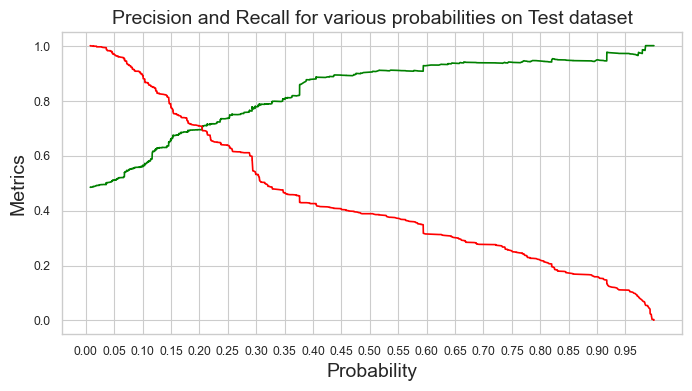

In [367]:
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") 
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(threshold,p[:-1] , 'g-')
plt.plot(threshold,r[:-1] , 'r-')

plt.xticks(np.arange(0, 1, step=0.05))
plt.title('Precision and Recall for various probabilities on Test dataset', fontsize=14)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.show()

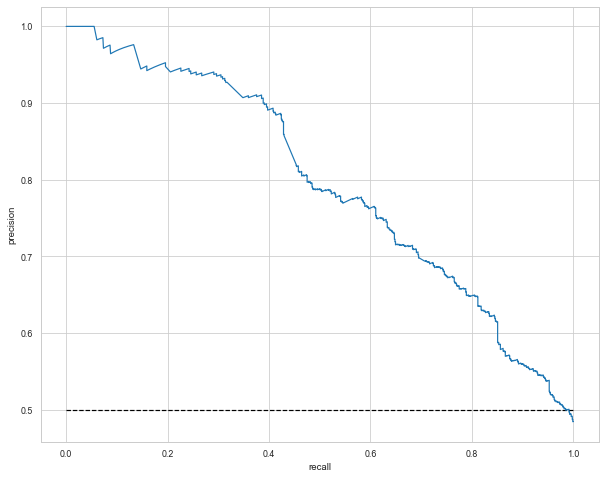

In [368]:
plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(r, p, label = 'Knn')
plt.xlabel('recall')
plt.ylabel('precision')

plt.show()

In [369]:
auc_prc = metrics.auc(r, p)
print('AUC Score on Test Dataset = ', auc_prc)

AUC Score on Test Dataset =  0.7945762013701612


In [370]:
#Using the value '.42' as cut-off

y_test_predicted_final['Precision_recall_Converted'] = y_test_predicted_final['Converted_Prediction'].map(lambda x: 1 if x > 0.42 else 0)

In [371]:
y_test_predicted_final.head()

,Student_ID,Converted,Converted_Prediction,Model_Predicted,Lead_Score,Precision_recall_Converted
0,8402,1,0.068155,0,7,0
1,8782,0,0.046350,0,5,0
2,6199,1,0.213728,0,21,0
3,6482,1,0.562728,1,56,1
4,6026,1,0.820042,1,82,1


In [372]:
accuracy_pr = metrics.accuracy_score(y_test_predicted_final['Converted'], y_test_predicted_final['Precision_recall_Converted'])

In [373]:
print(accuracy_pr)

0.6903765690376569


## Final Snapshot of Test DataFrame with Lead Score

In [374]:
y_test_predicted_final.head()

,Student_ID,Converted,Converted_Prediction,Model_Predicted,Lead_Score,Precision_recall_Converted
0,8402,1,0.068155,0,7,0
1,8782,0,0.046350,0,5,0
2,6199,1,0.213728,0,21,0
3,6482,1,0.562728,1,56,1
4,6026,1,0.820042,1,82,1


# We got 79% accuracy similar to precision and recall.

In [375]:
# Selected Feature Validation and Impact
pd.options.display.float_format = '{:.2f}'.format
model_params = res4.params[1:]
model_params

Total Time Spent on Website                         1.11
Lead Origin_Landing Page Submission                -0.65
Lead Source_Direct Traffic                         -0.45
Lead Source_Olark Chat                              1.26
Lead Source_Reference                               3.29
Lead Source_Welingak Website                        5.88
Last Activity_Email Bounced                        -1.48
Last Activity_Had a Phone Conversation              2.73
Last Activity_Olark Chat Conversation              -0.67
Last Activity_SMS Sent                              0.89
What is your current occupation_Housewife          20.27
What is your current occupation_Student            -2.29
What is your current occupation_Unemployed         -2.30
Last Notable Activity_Email Link Clicked           -0.45
Last Notable Activity_Modified                     -0.85
Last Notable Activity_Page Visited on Website      -0.30
Last Notable Activity_Unreachable                   2.45
Last Notable Activity_Unsubscri

In [376]:
feature_importance = model_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Total Time Spent on Website                          5.48
Lead Origin_Landing Page Submission                 -3.22
Lead Source_Direct Traffic                          -2.21
Lead Source_Olark Chat                               6.23
Lead Source_Reference                               16.20
Lead Source_Welingak Website                        28.98
Last Activity_Email Bounced                         -7.28
Last Activity_Had a Phone Conversation              13.47
Last Activity_Olark Chat Conversation               -3.29
Last Activity_SMS Sent                               4.37
What is your current occupation_Housewife          100.00
What is your current occupation_Student            -11.32
What is your current occupation_Unemployed         -11.37
Last Notable Activity_Email Link Clicked            -2.22
Last Notable Activity_Modified                      -4.20
Last Notable Activity_Page Visited on Website       -1.50
Last Notable Activity_Unreachable                   12.09
Last Notable A

In [377]:
#Sorting the feature variables based on their relative coefficient values

sorted_arr = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_arr

Total Time Spent on Website                         12
Lead Origin_Landing Page Submission                 11
Lead Source_Direct Traffic                           6
Lead Source_Olark Chat                              30
Lead Source_Reference                               14
Lead Source_Welingak Website                        17
Last Activity_Email Bounced                          8
Last Activity_Had a Phone Conversation               1
Last Activity_Olark Chat Conversation               13
Last Activity_SMS Sent                               2
What is your current occupation_Housewife           15
What is your current occupation_Student             27
What is your current occupation_Unemployed          19
Last Notable Activity_Email Link Clicked            24
Last Notable Activity_Modified                      22
Last Notable Activity_Page Visited on Website       32
Last Notable Activity_Unreachable                   25
Last Notable Activity_Unsubscribed                  28
Specializa

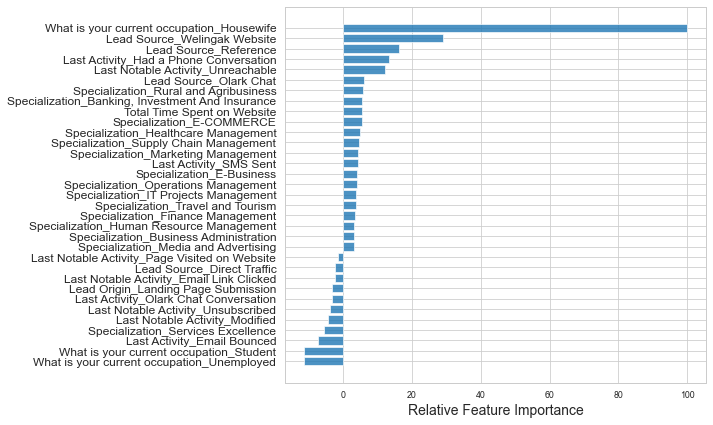

In [378]:
# Plot to show the relative significance of each feature in the model 

pos = np.arange(sorted_arr.shape[0]) + .5

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.barh(pos, feature_importance[sorted_arr], align='center', color = 'tab:blue',alpha=0.8)
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col].columns)[sorted_arr], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()